In [ ]:
## show that the how increase confidence works
#show the initial confidence and the final confidence after the iterations

## measure the PGDD loss for in-distibution vs out-of-distribution images


## measure the difference between the layers for PGDD

In [1]:

%reload_ext autoreload
%autoreload 2

import socket
import os
if socket.gethostname().startswith('ax'):
    path_prefix = '/mnt/smb/locker/miller-locker/users/Tahereh'
    path_codes = '/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    sys.path.append('/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Illusions')
elif socket.gethostname().startswith('demo'):
    path_prefix = '/home/tahereh/engram/users/Tahereh'
    path_codes = '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    
print(os.getcwd())


## Settings of results 
fontsize_text = 25
color_text = 'mediumseagreen'
fontsize_text = 12


resultsdir = os.path.join(path_prefix, 'Research/Results/Generative_Inference')

# get the labels for imagenet
from Stimuli.load_stimuli import labels_imagenet


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference
Kernel running on local computer 'demo'.
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


image names:  ('self', 'image_name', 'image_original', 'cmap')


args is a dictionary
get_dict_hash: dataset: imagenet, model_arch: resnet50
Loading model from imagenet
Loading model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/0_checkpoint.pt
=> loading checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/0_checkpoint.pt'
=> loaded checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/0_checkpoint.pt' (epoch 1)
****** Loaded model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/0_checkpoint.pt
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), pad

/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


args is a dictionary
get_dict_hash: dataset: imagenet, model_arch: resnet50
Loading model from imagenet
Loading model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/2_checkpoint.pt
=> loading checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/2_checkpoint.pt'
=> loaded checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/2_checkpoint.pt' (epoch 3)
****** Loaded model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_8.00/234ae998-bf89-4465-8365-169b27085b08/2_checkpoint.pt
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), pad

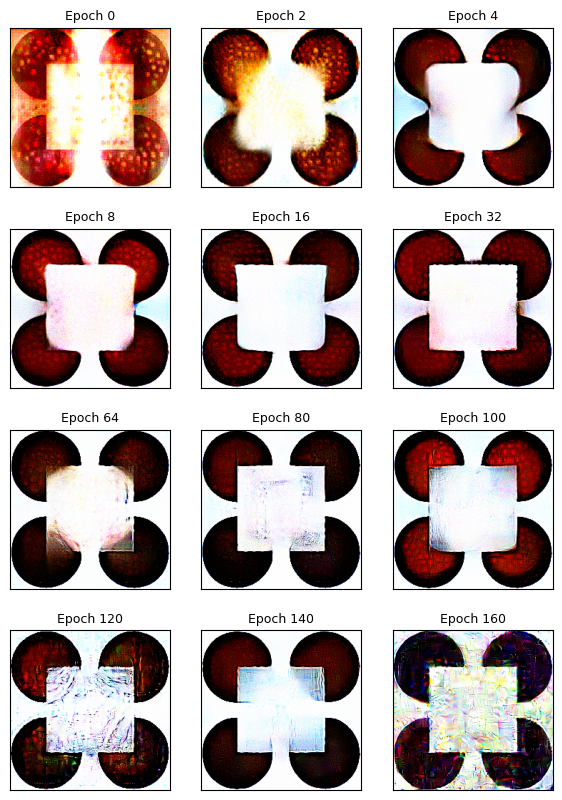

In [27]:
import torch
from Models import load_models
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

from Stimuli.load_stimuli import ImageLoader
from Inference.Generative_infernece import generative_inference
fontsize_title = 9

## pretty print the model_config
# Reverse Diffusion
# inference_config = {'loss_infer': 'PGDD',#'IncreaseConfidence',# #'IncreaseConfidence', #'PGDD', 
#                     'loss_function': 'MSE',#'MSE',# #'CE', #'MSE', 
#                     'n_itr':1001, 
#                     'eps': 3, #3, 
#                     'step_size': 0.1, #3
#                     'diffusion_noise_ratio': 0.005,#0.05, 
#                     'initial_inference_noise_ratio': 0.2,# #0.1, 
#                     #'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24,  32, 36, 40, 44, 48, 52, 56, 60, 64, 80, 90, 100],
#                     # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24,  32, 36, 40, 44, 48, 52, 60, 80, 100, 150, 180, 200],
#                     'iterations_to_show': [0, 1, 2, 10, 50, 100,  200,  300, 400, 500, 600, 700,800,900,1000],

#                     # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 32, 64, 80, 100, 128, 160, 180, 200, 240, 280, 320, 420, 520, 620, 720, 820, 920,],
#                     'top_layer': 'all', #'layer4', #'avgpool', #'all',
#                     'inference_normalization': 'off',
#                     'recognition_normalization': 'on',
#                     'misc_info': {'keep_grads': True,}
#                     }

                    
# # Increase Confidence
inference_config = {'loss_infer': 'IncreaseConfidence',#'IncreaseConfidence',# #'IncreaseConfidence', #'PGDD', 
                    'loss_function': 'CE',#'MSE',# #'CE', #'MSE', 
                    'n_itr':501, 
                    'eps': 3, #0.5, 
                    'step_size': 0.5, #0.5
                    'diffusion_noise_ratio': 0.003,#0.05, 
                    'initial_inference_noise_ratio': 0.01,#0.05, #0.1, 
                    # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 80, 90, 100],
                    'iterations_to_show': [0, 1, 2, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
                    'top_layer': 'all', #'layer4', #'avgpool', #'all',
                    'inference_normalization': 'off',
                    'recognition_normalization': 'off',
                    'misc_info': {'keep_grads': True,}
                    }

selected_epochs = [0, 2, 4, 8, 16, 32, 64, 80, 100, 120, 140, 160]
n_rows = 4
n_cols = len(selected_epochs)//n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=[7, 10])

for iepoch, epoch in enumerate(selected_epochs):

    # for face net: 'advrobust_L2_eps_0.50' checkpoint 100
    class Args:
        def __init__(self) -> None:
            self.model_arch = 'resnet50'
            
            self.dataset_model = 'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
            self.model_training ='advrobust_L2_eps_8.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
            
            # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
            # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
            
            # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
            # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
            
            self.epoch_chkpnt = epoch#'madryfull' #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
            self.eval_dataset_identifier = 'vggface2_test'
            self.batch_size = 32


    args = Args()

    if args.dataset_model == 'vggface2':
        assert args.model_training == 'advrobust_L2_eps_0.50'
        args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
        args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
        args.n_classes = 500
    elif 'imagenet' in  args.dataset_model or 'places365' in args.dataset_model:
        args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
        args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
        args.n_classes = 1000
    else:
        raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
            

    #'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
    # Load the model -----------------------------
    model_args = {'model_arch': args.model_arch, 
                'model_training': args.model_training,
                'input_size': 224,
                'dataset': args.dataset_model,
                'epoch_chkpnt': args.epoch_chkpnt,
                'norm_mean': args.norm_mean,
                'norm_std': args.norm_std,
                'n_classes': args.n_classes,
                #   'inference': args.inference
                }

    model, _ = load_models.load_models(model_args)
    model = torch.nn.DataParallel(model).cuda()
    _=model.eval()


    model_config = {'model': model, 'dataset_model': args.dataset_model, **model_args}

    image_name = 'KanizsaSq' #'KanizsaRealContours' #'KanizsaSq' #'KanizsaRealContours' #'KanizsaSq' 
    image, cmap = ImageLoader(args.dataset_model).load_image(image_name)


    selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict = generative_inference(model_config, image, inference_config)
    iteration_numbers = inference_config['iterations_to_show']
    if inference_config['misc_info']['keep_grads']:
        selected_grad_patterns = misc_info_dict['grad_info']
    else:
        selected_grad_patterns = []
    
    axes[iepoch//n_cols, iepoch%n_cols].imshow(selected_inferred_patterns[-1].squeeze(0).detach().cpu().numpy().transpose(1,2,0))
    axes[iepoch//n_cols, iepoch%n_cols].set_title(f'Epoch {epoch}', fontsize=fontsize_title)
    axes[iepoch//n_cols, iepoch%n_cols].set_xticks([])
    axes[iepoch//n_cols, iepoch%n_cols].set_yticks([])
    
    del selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict
    del model
    


In [28]:
fig.savefig(os.path.join(resultsdir, 'Parameters_Generative_inference',f'{args.model_arch}-{args.model_training}_{inference_config["loss_infer"]}-{inference_config["loss_function"]}-{inference_config["top_layer"]}-geninf_epochs{selected_epochs}.pdf'), dpi=300, bbox_inches='tight')
print('saved at', os.path.join(resultsdir, 'Parameters_Generative_inference',f'{args.model_arch}-{args.model_training}_{inference_config["loss_infer"]}-{inference_config["loss_function"]}-{inference_config["top_layer"]}-geninf_epochs{selected_epochs}.pdf'))

saved at /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/Parameters_Generative_inference/resnet50-advrobust_L2_eps_8.00_IncreaseConfidence-CE-all-geninf_epochs[0, 2, 4, 8, 16, 32, 64, 80, 100, 120, 140, 160].pdf
